In [1]:
import cudf
import cupy
import cuml

# Inspecting Data

In [2]:
#competition data (class unknown). Only 50% of this data will be used to create the public leaderboard 
df_comp=cudf.read_csv("../input/how-to-be-instagram-famous-with-data-science/comp.csv")
df_comp

,page_likes,page_interaction,page_category,tot_no_comments_bef,no_comments_24h,no_comments_48_24h,no_comments_24h_after_pub,delta_48_24h,character_count_post,no_shares_post,day_posted,current_day,has_new_comments,ID
0,9412,882,44,0,0,0,0,0,177,1,TUESDAY,WEDNESDAY,<NA>,CP1
1,12502091,36590,14,117,107,0,111,104,0,171,FRIDAY,SATURDAY,<NA>,CP2
2,4590,1050,18,5,1,0,4,1,18,2,WEDNESDAY,SATURDAY,<NA>,CP3
3,136038,36,55,0,0,0,0,0,366,1,WEDNESDAY,THURSDAY,<NA>,CP4
4,100214,1287,32,3,0,3,3,-3,213,1,THURSDAY,SATURDAY,<NA>,CP5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,14685,72,17,0,0,0,0,0,64,1,SATURDAY,TUESDAY,<NA>,CP1996
1996,68308,3902,2,37,2,3,29,-1,133,4,THURSDAY,SUNDAY,<NA>,CP1997
1997,1422095,35699,9,47,41,0,43,38,99,231,TUESDAY,TUESDAY,<NA>,CP1998
1998,37066,37,90,16,14,0,15,8,73,2,TUESDAY,WEDNESDAY,<NA>,CP1999


In [3]:
#development data (known class)
df_dev=cudf.read_csv("../input/how-to-be-instagram-famous-with-data-science/dev.csv")
df_dev

,page_likes,page_interaction,page_category,tot_no_comments_bef,no_comments_24h,no_comments_48_24h,no_comments_24h_after_pub,delta_48_24h,character_count_post,no_shares_post,day_posted,current_day,has_new_comments,ID
0,633016,168920,18,143,143,0,143,143,50,307,WEDNESDAY,WEDNESDAY,yes,P5548
1,115669,745,1,3,1,1,2,0,19,13,MONDAY,THURSDAY,no,P3655
2,640987,84288,1,5,1,4,5,-3,61,86,FRIDAY,SUNDAY,no,P1424
3,4913787,158828,9,77,2,75,75,-73,150,33,THURSDAY,SATURDAY,no,P6393
4,274207,100435,18,250,22,228,237,-206,8,36,WEDNESDAY,FRIDAY,yes,P5068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9084,83215,12259,18,10,10,0,10,10,118,13,TUESDAY,WEDNESDAY,yes,P7533
9085,420838,606,39,9,0,4,6,-4,44,42,FRIDAY,MONDAY,no,P3873
9086,10039,1151,56,1,0,1,1,-1,377,1,SATURDAY,SUNDAY,no,P9036
9087,879585,49540,9,1,1,0,1,1,0,6,SATURDAY,SATURDAY,yes,P9055


In [4]:
y = df_dev['has_new_comments']

In [5]:
y

0       yes
1        no
2        no
3        no
4       yes
       ... 
9084    yes
9085     no
9086     no
9087    yes
9088    yes
Name: has_new_comments, Length: 9089, dtype: object

In [6]:
df_dev.info()
df_comp.info()

<class 'cudf.core.dataframe.DataFrame'>
RangeIndex: 9089 entries, 0 to 9088
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   page_likes                 9089 non-null   int64
 1   page_interaction           9089 non-null   int64
 2   page_category              9089 non-null   int64
 3   tot_no_comments_bef        9089 non-null   int64
 4   no_comments_24h            9089 non-null   int64
 5   no_comments_48_24h         9089 non-null   int64
 6   no_comments_24h_after_pub  9089 non-null   int64
 7   delta_48_24h               9089 non-null   int64
 8   character_count_post       9089 non-null   int64
 9   no_shares_post             9089 non-null   int64
 10  day_posted                 9089 non-null   object
 11  current_day                9089 non-null   object
 12  has_new_comments           9089 non-null   object
 13  ID                         9089 non-null   object
dtypes: int64(10), obje

In [7]:
# target=df_dev.iloc[:,12:13]

# Data Handling

In [8]:
#since ID is just refernce variable we are dropping it
#also dropping th target variable
df_train=df_dev.drop(['ID','has_new_comments'], axis = 1)
df_train

,page_likes,page_interaction,page_category,tot_no_comments_bef,no_comments_24h,no_comments_48_24h,no_comments_24h_after_pub,delta_48_24h,character_count_post,no_shares_post,day_posted,current_day
0,633016,168920,18,143,143,0,143,143,50,307,WEDNESDAY,WEDNESDAY
1,115669,745,1,3,1,1,2,0,19,13,MONDAY,THURSDAY
2,640987,84288,1,5,1,4,5,-3,61,86,FRIDAY,SUNDAY
3,4913787,158828,9,77,2,75,75,-73,150,33,THURSDAY,SATURDAY
4,274207,100435,18,250,22,228,237,-206,8,36,WEDNESDAY,FRIDAY
...,...,...,...,...,...,...,...,...,...,...,...,...
9084,83215,12259,18,10,10,0,10,10,118,13,TUESDAY,WEDNESDAY
9085,420838,606,39,9,0,4,6,-4,44,42,FRIDAY,MONDAY
9086,10039,1151,56,1,0,1,1,-1,377,1,SATURDAY,SUNDAY
9087,879585,49540,9,1,1,0,1,1,0,6,SATURDAY,SATURDAY


In [9]:
df_train.info()

<class 'cudf.core.dataframe.DataFrame'>
RangeIndex: 9089 entries, 0 to 9088
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   page_likes                 9089 non-null   int64
 1   page_interaction           9089 non-null   int64
 2   page_category              9089 non-null   int64
 3   tot_no_comments_bef        9089 non-null   int64
 4   no_comments_24h            9089 non-null   int64
 5   no_comments_48_24h         9089 non-null   int64
 6   no_comments_24h_after_pub  9089 non-null   int64
 7   delta_48_24h               9089 non-null   int64
 8   character_count_post       9089 non-null   int64
 9   no_shares_post             9089 non-null   int64
 10  day_posted                 9089 non-null   object
 11  current_day                9089 non-null   object
dtypes: int64(10), object(2)
memory usage: 908.3+ KB


checking wheter all weekdays are present 


In [10]:
print(df_train.day_posted.unique())

0       FRIDAY
1       MONDAY
2     SATURDAY
3       SUNDAY
4     THURSDAY
5      TUESDAY
6    WEDNESDAY
Name: day_posted, dtype: object


In [11]:
# import seaborn as sns
# sns.catplot(kind='box',data=df_train.values())

### One hot encoding the categorical data 
we choose one hot encoding becasue  inherently our categorical values(Weekdays) donot have any order that would influence our data

In [12]:
# days_of_week=['MONDAY,TUESDAY,WEDNESDAY,THURSDAY,FRIDAY,SATURDAY,SUNDAY']
# from cuml.preprocessing import OneHotEncoder
# encoder=OneHotEncoder()
data=cudf.get_dummies(df_train,columns=['current_day','day_posted'])
data

,page_likes,page_interaction,page_category,tot_no_comments_bef,no_comments_24h,no_comments_48_24h,no_comments_24h_after_pub,delta_48_24h,character_count_post,no_shares_post,...,current_day_THURSDAY,current_day_TUESDAY,current_day_WEDNESDAY,day_posted_FRIDAY,day_posted_MONDAY,day_posted_SATURDAY,day_posted_SUNDAY,day_posted_THURSDAY,day_posted_TUESDAY,day_posted_WEDNESDAY
0,633016,168920,18,143,143,0,143,143,50,307,...,0,0,1,0,0,0,0,0,0,1
1,115669,745,1,3,1,1,2,0,19,13,...,1,0,0,0,1,0,0,0,0,0
2,640987,84288,1,5,1,4,5,-3,61,86,...,0,0,0,1,0,0,0,0,0,0
3,4913787,158828,9,77,2,75,75,-73,150,33,...,0,0,0,0,0,0,0,1,0,0
4,274207,100435,18,250,22,228,237,-206,8,36,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9084,83215,12259,18,10,10,0,10,10,118,13,...,0,0,1,0,0,0,0,0,1,0
9085,420838,606,39,9,0,4,6,-4,44,42,...,0,0,0,1,0,0,0,0,0,0
9086,10039,1151,56,1,0,1,1,-1,377,1,...,0,0,0,0,0,1,0,0,0,0
9087,879585,49540,9,1,1,0,1,1,0,6,...,0,0,0,0,0,1,0,0,0,0


Standardizing the data. Because in page_interaction nad page_likes we have huge numbers wheresa sa rest to of numerical data is small

In [13]:
from cuml.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled_one=scaler.fit_transform(data)
df_scaled_one

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-0.075443,1.151313,-0.318787,0.692574,1.590222,-0.268763,0.760943,1.505210,-0.272502,0.337103,...,-0.400434,-0.398026,2.315252,-0.425445,-0.404862,-0.410917,-0.374511,-0.408353,-0.417843,2.410029
1,-0.131462,-0.371528,-1.160898,-0.384740,-0.267195,-0.254420,-0.393756,-0.028846,-0.343601,-0.178149,...,2.497292,-0.398026,-0.431918,-0.425445,2.469976,-0.410917,-0.374511,-0.408353,-0.417843,-0.414933
2,-0.074580,0.384962,-1.160898,-0.369350,-0.267195,-0.211390,-0.369188,-0.061029,-0.247274,-0.050212,...,-0.400434,-0.398026,-0.431918,2.350482,-0.404862,-0.410917,-0.374511,-0.408353,-0.417843,-0.414933
3,0.388091,1.059929,-0.764611,0.184698,-0.254114,0.806968,0.204067,-0.811966,-0.043152,-0.143097,...,-0.400434,-0.398026,-0.431918,-0.425445,-0.404862,-0.410917,-0.374511,2.448861,-0.417843,-0.414933
4,-0.114295,0.531174,-0.318787,1.515950,0.007494,3.001458,1.530742,-2.238745,-0.368829,-0.137840,...,-0.400434,-0.398026,-0.431918,-0.425445,-0.404862,-0.410917,-0.374511,-0.408353,-0.417843,2.410029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9084,-0.134977,-0.267268,-0.318787,-0.330874,-0.149471,-0.268763,-0.328241,0.078430,-0.116544,-0.178149,...,-0.400434,-0.398026,2.315252,-0.425445,-0.404862,-0.410917,-0.374511,-0.408353,2.393242,-0.414933
9085,-0.098418,-0.372787,0.721468,-0.338569,-0.280275,-0.211390,-0.360998,-0.071757,-0.286263,-0.127324,...,-0.400434,-0.398026,-0.431918,2.350482,-0.404862,-0.410917,-0.374511,-0.408353,-0.417843,-0.414933
9086,-0.142900,-0.367852,1.563579,-0.400130,-0.280275,-0.254420,-0.401945,-0.039574,0.477472,-0.199179,...,-0.400434,-0.398026,-0.431918,-0.425445,-0.404862,2.433581,-0.374511,-0.408353,-0.417843,-0.414933
9087,-0.048744,0.070315,-0.764611,-0.400130,-0.267195,-0.268763,-0.401945,-0.018119,-0.387177,-0.190416,...,-0.400434,-0.398026,-0.431918,-0.425445,-0.404862,2.433581,-0.374511,-0.408353,-0.417843,-0.414933


In [14]:
# from cuml.preprocessing import LabelEncoder
# le=LabelEncoder()
# df_train['day_posted']=le.fit_transform(df_train['day_posted'])
# df_train['current_day']=le.fit_transform(df_train['current_day'])
# df_train

### analysing correation between features

<AxesSubplot:>

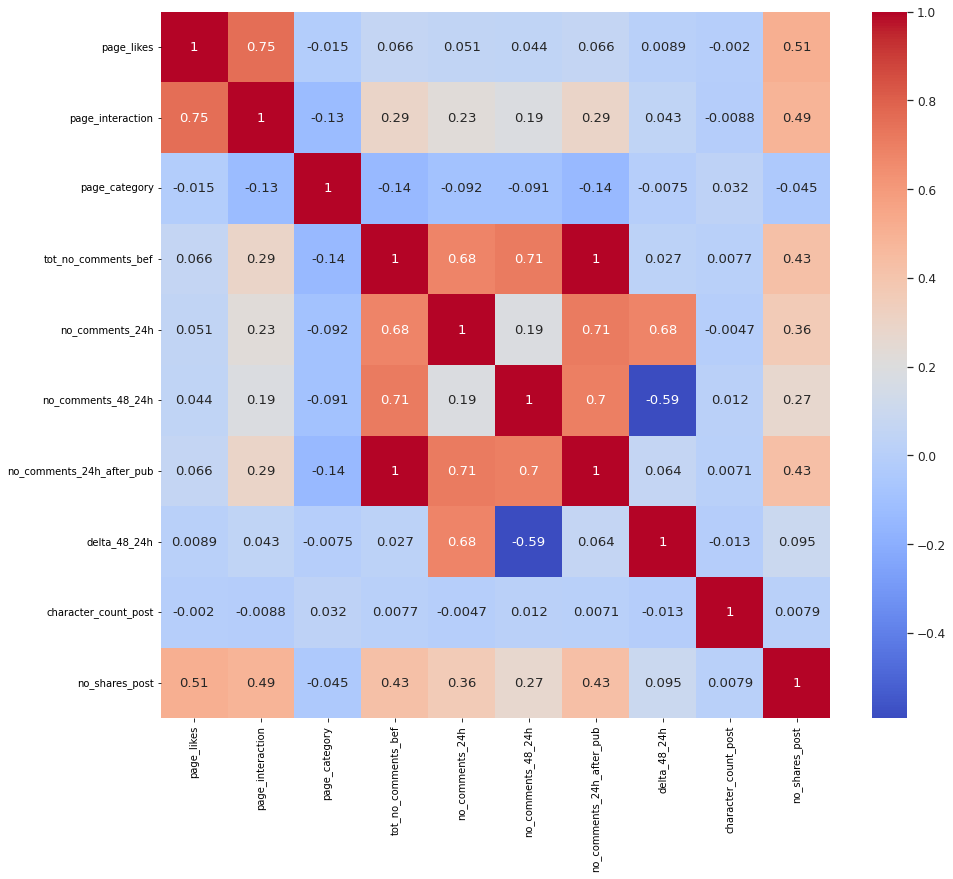

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(15, 13))
sns.set(font_scale=1.1)
sns.heatmap(df_train.to_pandas().corr(),annot=True,cmap='coolwarm')

### There are couple of highly corelated features but its at max 0.75 so we not going to drop any feature

In [16]:
# from cuml.preprocessing import StandardScaler
# scaler = StandardScaler()
# df_scaled=scaler.fit_transform(df_train)
# df_scaled

In [17]:
type(df_scaled_one),type(y)

(cudf.core.dataframe.DataFrame, cudf.core.series.Series)

In [18]:
#label encoding the target variable as train_test_split won't accept categories
from cuml.preprocessing.LabelEncoder import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y

0       1
1       0
2       0
3       0
4       1
       ..
9084    1
9085    0
9086    0
9087    1
9088    1
Length: 9089, dtype: uint8

## Preprocessing Test Data

In [19]:
df_test=df_comp.drop(['ID','has_new_comments'], axis = 1)
df_test

,page_likes,page_interaction,page_category,tot_no_comments_bef,no_comments_24h,no_comments_48_24h,no_comments_24h_after_pub,delta_48_24h,character_count_post,no_shares_post,day_posted,current_day
0,9412,882,44,0,0,0,0,0,177,1,TUESDAY,WEDNESDAY
1,12502091,36590,14,117,107,0,111,104,0,171,FRIDAY,SATURDAY
2,4590,1050,18,5,1,0,4,1,18,2,WEDNESDAY,SATURDAY
3,136038,36,55,0,0,0,0,0,366,1,WEDNESDAY,THURSDAY
4,100214,1287,32,3,0,3,3,-3,213,1,THURSDAY,SATURDAY
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,14685,72,17,0,0,0,0,0,64,1,SATURDAY,TUESDAY
1996,68308,3902,2,37,2,3,29,-1,133,4,THURSDAY,SUNDAY
1997,1422095,35699,9,47,41,0,43,38,99,231,TUESDAY,TUESDAY
1998,37066,37,90,16,14,0,15,8,73,2,TUESDAY,WEDNESDAY


In [20]:
test_data=cudf.get_dummies(df_test,columns=['current_day','day_posted'])
from cuml.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled_test=scaler.fit_transform(test_data)

### Splitting data in train and validation sets

In [21]:
from cuml.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(df_scaled_one,y,test_size=0.2,random_state=0)

## MODEL Selection and Training

In [22]:
from cuml import LogisticRegression
reg = LogisticRegression()
reg.fit(df_scaled_one,y)
print("Coefficients:")
print(reg.coef_)
print("Intercept:")
print(reg.intercept_)
preds = reg.predict(X_valid)
print("Predictions:")
print(preds)

Coefficients:
0    -0.115177
1     0.081278
2    -0.054355
3     0.835509
4     8.779250
5     3.597744
6    -0.681570
7     4.509277
8     0.072184
9     0.111214
10    0.023809
11   -0.004063
12   -0.044684
13    0.009529
14   -0.034888
15    0.006766
16    0.040958
17    0.009498
18   -0.042762
19    0.028102
20   -0.011318
21    0.008194
22   -0.017956
23    0.024890
dtype: float64
Intercept:
0    2.334852
dtype: float64
Predictions:
0       0
1       0
2       1
3       0
4       0
       ..
1812    0
1813    1
1814    1
1815    1
1816    0
Length: 1817, dtype: uint8


In [23]:
from cuml.metrics import accuracy_score
score = accuracy_score(y_valid,preds)
score

0.7969179749488831

In [24]:
from cuml.ensemble import RandomForestClassifier as cuRFC
rfc_model = cuRFC(max_features=1.0,
                   n_bins=10,
                   n_estimators=40,random_state=42,min_samples_leaf=50)
rfc_model.fit(X_train,y_train)
rfc_predict = rfc_model.predict(X_valid)
score_rf=accuracy_score(y_valid,rfc_predict)
score_rf

/opt/conda/lib/python3.7/site-packages/cuml/internals/api_decorators.py:794: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams==1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/opt/conda/lib/python3.7/site-packages/cuml/internals/api_decorators.py:567: UserWarning: To use pickling or GPU-based prediction first train using float32 data to fit the estimator
  ret_val = func(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/cuml/internals/api_decorators.py:586: UserWarning: GPU based predict only accepts np.float32 data. The model was trained on np.float64 data hence cannot use GPU-based prediction! 
Defaulting to CPU-based Prediction. 
To predict on float-64 data, set parameter predict_model = 'CPU'
  ret_val = func(*args, **kwargs)


0.8183819651603699

MODEL TESTING

In [25]:
import xgboost as xgb
clf_xgb=xgb.XGBClassifier(use_label_encoder=False,learning_rate =0.1, n_estimators=140, max_depth=3,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)
clf_xgb.fit(X_train,y_train)
xgpred=clf_xgb.predict(df_scaled_test)
score_rf=accuracy_score(y_valid,xgpred)
score_rf

[18:33:08] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.4699999988079071

**XGBoost hyper parameter tuning**

In [26]:
# import cuml.model_selection as dcv
from sklearn.model_selection import GridSearchCV
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = xgb.XGBClassifier( use_label_encoder=False,learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4, cv=5)
gsearch1.fit(X_train.to_pandas(),y_train.to_pandas())
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

[18:34:25] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


({'mean_fit_time': array([6.86262584, 2.000316  , 2.22729716, 3.47106023, 3.26980276,
         3.77126799, 5.24133816, 4.94420891, 4.82284064, 7.28552279,
         6.67414093, 5.34524369]),
  'std_fit_time': array([2.27709376, 0.19620004, 0.20179613, 0.17140895, 0.22063628,
         0.20121765, 0.35515756, 0.20427242, 0.47211238, 0.24137246,
         0.24950577, 0.79787701]),
  'mean_score_time': array([0.02097259, 0.02826142, 0.04692917, 0.0335391 , 0.03359075,
         0.03213248, 0.05734072, 0.04467864, 0.053789  , 0.06541572,
         0.04060483, 0.04394898]),
  'std_score_time': array([0.01577801, 0.01003585, 0.00870406, 0.01150071, 0.0137666 ,
         0.01275845, 0.00522967, 0.00710908, 0.01113473, 0.02343354,
         0.00717148, 0.02603016]),
  'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7, 9, 9, 9],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, False, False],
         fill_value='?',
         

**SINCE RANDOM FOREST CLASSIFIER GIVES BEST ACCURACY WE GO AHEAD WITH IT**

In [27]:
Rfc_predict = rfc_model.predict(df_scaled_test)

/opt/conda/lib/python3.7/site-packages/cuml/internals/api_decorators.py:586: UserWarning: GPU based predict only accepts np.float32 data. The model was trained on np.float64 data hence cannot use GPU-based prediction! 
Defaulting to CPU-based Prediction. 
To predict on float-64 data, set parameter predict_model = 'CPU'
  ret_val = func(*args, **kwargs)


In [28]:
Rfc_predict

0       0
1       1
2       0
3       0
4       0
       ..
1995    0
1996    0
1997    1
1998    1
1999    1
Length: 2000, dtype: uint8

In [29]:
# list_string = map(str, Rfc_predict)
# list_string=list(list_string)
# for i in range(len(list_string)):
#     if(list_string[i]==1):
#         list_string[i]='yes'
#     else:
#         list_string[i]='no'
Rfc_predict=le.inverse_transform(Rfc_predict)

In [30]:

Rfc_predict

0        no
1       yes
2        no
3        no
4        no
       ... 
1995     no
1996     no
1997    yes
1998    yes
1999    yes
Length: 2000, dtype: object

In [31]:
Id=df_comp['ID']
# list_string=cudf.Series(list_string)
submission=cudf.concat([df_comp['ID'],Rfc_predict], axis=1)
submission

,ID,0
0,CP1,no
1,CP2,yes
2,CP3,no
3,CP4,no
4,CP5,no
...,...,...
1995,CP1996,no
1996,CP1997,no
1997,CP1998,yes
1998,CP1999,yes


In [32]:
submission.to_csv('./submission.csv')

In [33]:
 gsearch1.best_params_

{'max_depth': 3, 'min_child_weight': 1}